#Week 2 Exercises

In this weeks exercises you will use Numpy/Scipy to impliment some numerical algorithms and then you will use Pandas to perform a rudamentary data analysis using the KDD 98 dataset.  Along the way you will use unix/basic python from the first week as well as git to save your work.

As a first step we import the libraries we'll use later on.  This allows us to use numpy library calls by prefixing the call with np.

In [27]:
import numpy as np
import scipy as sp
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import time


##Matrix Manipulations
Lets first create a matrix and perform some manipulations of it.

Using numpy's matrix data structure, define the following matricies:

$$A=\left[ \begin{array}{ccc} 3 & 5 & 9 \\ 3 & 3 & 4 \\ 5 & 9 & 17 \end{array} \right]$$

$$B=\left[ \begin{array}{c} 2 \\ 1 \\ 4 \end{array} \right]$$

After this solve the matrix equation:
$$Ax = B$$

Now write three functions for matrix multiply $C=AB$ in each of the following styles:

1. By using nested for loops to impliment the naive algorithm ($C_{ij}=\sum_{k=0}^{m-1}A_{ik}B_{kj}$)
2. Using numpy's built in martrix multiplication  
3. Using Cython

The three methods should have the same answer

In [2]:
A = np.array([[3,5,9],[3,3,4],[5,9,17]])
B = np.array([2,1,4]).reshape(-1,1)
x = np.linalg.inv(A)@B


def matrixMultiplication(x,y):
    x=np.array(x)
    y=np.array(y)        
    z=[]
  
    for xj in range(x.shape[0]):            
     
        row=[]
        for yi in range(y.shape[1]):
            row.append(np.sum(x[xj]*y[:,yi]))
        z.append(row)
    return z
            
print(matrixMultiplication(A,B))
def numpy_dot(x,y):
    return np.dot(x,y)
print(numpy_dot(A,B))

[[47], [25], [87]]
[[47]
 [25]
 [87]]


Now we wish to evaluate the performance of these three methods.  Write a method that given three dmiensions (a,b,c) makes a random a x b and b x c matrix and computes the product using your three functions and reports the speed of each method.

After this measure performance of each method for all $a,b,c \in \{10,100,1000,10000\}$ and plot the results.  Is one method always the fastest?  Discuss why this is or is not the case.

**BONUS** Now repeat the past two problems but instead of computing the matrix product, compute a matrix's [determinant](http://en.wikipedia.org/wiki/Determinant).  Measure performance for matricies of various sizes and discuss the results.  Determinant may get impractical to calculate for not too huge of matricies, so no need to goto 1000x1000 matricies.

In [3]:
def genRand(a,b,c):
    mat1=[[np.random.randint(0,9) for i in range(a)] for i in range(b)]
    mat2=[[np.random.randint(0,9) for i in range(b)] for i in range(c)]
    return mat1, mat2

loopTime=[]
numpyTime=[]

#calculations of numpy
numpyTime.append(time.time())
print('N1')
A,B=genRand(10,10,10)
numpy_dot(A,B)
numpyTime.append(time.time())
print ('N2')
A,B=genRand(10,100,10)
numpy_dot(A,B)
numpyTime.append(time.time())
print ('N3')
A,B=genRand(10,1000,10)
numpy_dot(A,B)
numpyTime.append(time.time())


#calculations of loop
loopTime.append(time.time())
print ('L1')
A,B=genRand(10,10,10)
matrixMultiplication(A,B)
loopTime.append(time.time())
print ('L2')
A,B=genRand(10,100,10)
matrixMultiplication(A,B)
loopTime.append(time.time())
print ('L3')
A,B=genRand(10,1000,10)
matrixMultiplication(A,B)
loopTime.append(time.time())

loopTime=np.diff(loopTime)
numpyTime = np.diff(numpyTime)

N1
N2
N3
L1
L2
L3


In [4]:
print(loopTime,numpyTime)

[0.00800133 0.05538082 4.89380527] [0.         0.01155043 0.05601597]


          loopTime  numpyTime
1000.0    0.008001   0.000000
10000.0   0.055381   0.011550
100000.0  4.893805   0.056016


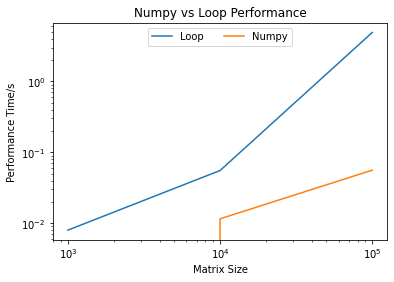

In [29]:
df = pd.DataFrame(data={'loopTime':loopTime,'numpyTime':numpyTime}, )
matSize=[1e3,1e4,1e5]
df.index = matSize               
print (df)


plt.plot(matSize,loopTime)
plt.plot(matSize,numpyTime)
plt.subplot(111)
plt.xscale('log')

plt.legend(['Loop','Numpy'],loc='upper center', ncol=3)
plt.yscale('log')
plt.xlabel('Matrix Size')
plt.ylabel('Performance Time/s')
plt.title('Numpy vs Loop Performance')
plt.show() 

In [7]:
dict_file = open("dict.dat")
col_types = [ (x.split("\t")[0], x.strip().split("\t")[1]) for x in dict_file.readlines() ]

In [8]:
df = pd.DataFrame(col_types,columns=['head','type'])
df.head()

,head,type
0,ODATEDW,Num
1,OSOURCE,Char
2,TCODE,Num
3,STATE,Char
4,ZIP,Char


###Summarizing Data
Now that we have loaded data into the learn table, we wish to to summarize the data.  
Write a function called summary which takes a pandas data frame and prints a summary of each column containing the following:

If the column is numeric:

1. Mean
2. Standard Deviation
3. Min/Max
4. Number of missing values (NaN, Inf, NA)

If the column is non alphabetical:

1. Number of distinct values
2. Number of missing values (NaN, INF, NA, blank/all spaces)
3. The frequency of the 3 most common values and 3 least common values

Format the output to be human readable.

For example:
> Field_1  
> mean: 50  
> std_dev: 25  
> min: 0  
> max: 100  
> missing: 5
>  
> Field_2  
> distinct_values: 100  
> missing: 10  
>  
> 3 most common:  
>   the: 1000  
>   cat: 950  
>   meows: 900  
>  
> 3 least common:  
>   dogs: 5  
>   lizards: 4  
>   eggs: 1  

 ### Pandas analysis on Calit2 data 

Import data from http://archive.ics.uci.edu/ml/machine-learning-databases/event-detection/CalIt2.data using curl

This data comes from the main door of the CalIt2 building at UCI. Observations come from 2 data streams (people flow in and out of the building), over 15 weeks, 48 time slices per day (half hour count aggregates).

Attribute Information:
1. Flow ID: 7 is out flow, 9 is in flow
2. Date: MM/DD/YY
3. Time: HH:MM:SS
4. Count: Number of counts reported for the previous half hour


In [9]:
! curl -O http://archive.ics.uci.edu/ml/machine-learning-databases/event-detection/CalIt2.data 
data = []
CalIt_data= open('CalIt2.data')
for line in CalIt_data:
    data.append(line.rstrip('\n').split(','))

CalIt_data.close()
    
df = pd.DataFrame(data,columns=['Flow ID', 'Date', 'Time', 'Count'])
df.head()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:03 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:04 --:--:--     0
  1  218k    1  3988    0     0    675      0  0:05:30  0:00:05  0:05:25  1258
 46  218k   46  100k    0     0  15393      0  0:00:14  0:00:06  0:00:08 25986
100  218k  100  218k    0     0  31091      0  0:00:07  0:00:07 --:--:-- 50225


,Flow ID,Date,Time,Count
0,7,07/24/05,00:00:00,0
1,9,07/24/05,00:00:00,0
2,7,07/24/05,00:30:00,1
3,9,07/24/05,00:30:00,0
4,7,07/24/05,01:00:00,0


#### Selecting Data ####
1. Select all data for the date July 24 2005 having flow id=7. Also output the row count of results 
2. Select all rows whose count is greater than 5. Sort the result on count in descending order and output the top 10 rows

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10082 entries, 0 to 10081
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Flow ID  10082 non-null  object
 1   Date     10080 non-null  object
 2   Time     10080 non-null  object
 3   Count    10080 non-null  object
dtypes: object(4)
memory usage: 315.2+ KB


In [11]:
df[(df['Date'] == '07/24/05') & (df['Flow ID']== '7')]

,Flow ID,Date,Time,Count
0,7,07/24/05,00:00:00,0
2,7,07/24/05,00:30:00,1
4,7,07/24/05,01:00:00,0
6,7,07/24/05,01:30:00,0
8,7,07/24/05,02:00:00,0
10,7,07/24/05,02:30:00,2
12,7,07/24/05,03:00:00,0
14,7,07/24/05,03:30:00,0
16,7,07/24/05,04:00:00,0
18,7,07/24/05,04:30:00,0


In [12]:
selected_10_rows = df[df['Count']>'5'].sort_values('Count').head(10)
selected_10_rows

,Flow ID,Date,Time,Count
3615,9,08/30/05,15:30:00,50
9935,9,11/04/05,11:00:00,50
8914,9,10/24/05,20:00:00,50
6878,7,10/03/05,15:30:00,52
9683,9,11/01/05,20:00:00,53
9684,7,11/01/05,20:30:00,54
9688,7,11/01/05,21:30:00,54
6881,9,10/03/05,16:00:00,55
2568,7,08/19/05,18:00:00,6
7753,9,10/12/05,18:00:00,6


#### Apply function ####
1. For the 10 rows outputted above, use Pandas Apply function to subtract lowest value of the 10 from all of them and then output the average value of the resulting counts
2. On the entire data, use apply function to sum all counts with flow_id=9 and date is 07/24/05

In [13]:
selected_10_rows['Count'] = selected_10_rows['Count'].apply(pd.to_numeric)
selected_10_rows['Count'].apply(lambda x : x-selected_10_rows['Count'].tail(1)).mean()

7753    37.0
dtype: float64

#### Indexing an Selecting ####
Exlain the following

1. loc: 
2. iloc:
3. ix:
4. at:
5. iat:

Highlight the differences by providing usecases where one is more useful than the other


Write a function to take two dates as input and return all flow ids and counts in that date range having both the dates inclusive. You can use pandas to_datetime function to convert the date to pandas datetime format 

In [14]:
def data_dates(dt1,dt2):
    return df[(df['Date']>dt1) & (df['Date']<dt2)][['Flow ID','Count']]

data_dates('07/24/05','08/30/05')

,Flow ID,Count
96,7,1
97,9,0
98,7,0
99,9,0
100,7,0
...,...,...
3547,9,1
3548,7,0
3549,9,0
3550,7,2


#### Grouping ####
1. Select data in the month of August 2005 having flow id=7
2. Group the data based on date and get the max count per date

In [15]:
condition1 = df.Date.str.startswith('08',na=False)
condition11 = df.Date.str.endswith('05',na=False)
condition2 = df['Flow ID']=='7'

df[(condition1 & condition11)&(condition2)]

,Flow ID,Date,Time,Count
768,7,08/01/05,00:00:00,1
770,7,08/01/05,00:30:00,0
772,7,08/01/05,01:00:00,0
774,7,08/01/05,01:30:00,0
776,7,08/01/05,02:00:00,0
...,...,...,...,...
3734,7,08/31/05,21:30:00,0
3736,7,08/31/05,22:00:00,2
3738,7,08/31/05,22:30:00,1
3740,7,08/31/05,23:00:00,0


In [16]:
grouped_df = df.groupby('Date')[['Count']].max()
grouped_df

,Count
Date,
07/24/05,4
07/25/05,9
07/26/05,9
07/27/05,9
07/28/05,9
...,...
11/01/05,9
11/02/05,9
11/03/05,9


#### Stacking, Unstacking ####
1. Stack the data with count and flow_id as indexes
2. Use reset_index to reset the stacked hierarchy by 1 level. The index then will just be the counts
3. Unstack the data to get back original data

In [17]:
stack = df.set_index(['Count','Flow ID']).stack()
stack

Count  Flow ID      
0      7        Date    07/24/05
                Time    00:00:00
       9        Date    07/24/05
                Time    00:00:00
1      7        Date    07/24/05
                          ...   
0      9        Time    23:00:00
1      7        Date    11/05/05
                Time    23:30:00
0      9        Date    11/05/05
                Time    23:30:00
Length: 20160, dtype: object

In [18]:
stack = stack.reset_index(level=1)
stack.head()

Flow ID         0
Count                       
0     Date       7  07/24/05
      Time       7  00:00:00
      Date       9  07/24/05
      Time       9  00:00:00
1     Date       7  07/24/05

In [19]:
stack = stack.reset_index()
stack.head()

,Count,level_1,Flow ID,0
0,0,Date,7,07/24/05
1,0,Time,7,00:00:00
2,0,Date,9,07/24/05
3,0,Time,9,00:00:00
4,1,Date,7,07/24/05


#### Pandas and Matplotlib

Plot a histogram of date vs total counts for flow_id=7 and flow_id=9 for the month of July 2005

In [20]:
df['Flow ID'] = pd.to_numeric(df['Flow ID'])
df['Count'] = pd.to_numeric(df['Count'])

In [21]:
condition1 = df['Flow ID']==7
condition11 = df['Flow ID'] == 9
condition2 = df.Date.str.startswith('07') & df.Date.str.endswith('05')

In [22]:
graph = df[(condition1 | condition11)&condition2]

<AxesSubplot:ylabel='Frequency'>

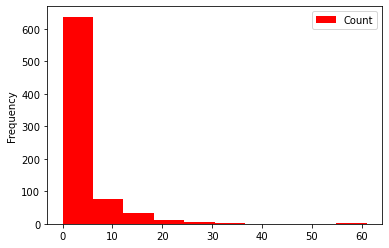

In [26]:

graph.plot(x='Date',y='Count',kind='hist',color='red')